In [45]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

## 1. Load data

In [10]:
def numerify(var):
    """
    Cast an object as an int or float if possible. Otherwise return unmodified
    """
    
    if isinstance(var, str):
        try:
            var = int(var)

        except:
            try:
                var = float(var)
            except:
                pass
    else:
        pass
            
    return var

In [48]:
#write a nice data loader
#should return metadata as a dict, data in a pandas df


def read_1D_data(fp):
    """
    Read a 1D Xenocs data .dat file
    """
    metadata = {}
    q = []
    I = []
    sig = []
    header_count = 0

    in_data = False # flag for if we are read into data yet

    with open(fp, 'rt') as f:
        for line in f:
            if not in_data:
                if line[:2] == '##': #metadata section header 
                    header_count +=1
                    continue
                elif line[:2] == '# ':
                    items = line.split()
                    metadata[items[1]] = numerify(items[2])

                elif line[0] == 'q' and header_count == 2:
                    in_data = True
            elif in_data:
                vals = line.split()
                q.append(numerify(vals[0]))
                I.append(numerify(vals[1]))
                sig.append(numerify(vals[2]))


    data = pd.DataFrame({'q':q, 'I':I, 'sig':sig})
    
    return data, metadata
                

        

In [49]:
esaxs_data, esaxs_metadata = read_1D_data('data/Data_0_00002.dat')
saxs_data, saxs_metadata = read_1D_data('data/Data_0_00016.dat')
maxs_data, maxs_metadata = read_1D_data('data/Data_0_00030.dat')

esaxs_bkg_data, esaxs_bkg_metadata = read_1D_data('data/Data_0_00012.dat')
saxs_bkg_data, saxs_bkg_metadata = read_1D_data('data/Data_0_00026.dat')
maxs_bkg_data, maxs_bkg_metadata = read_1D_data('data/Data_0_00040.dat')

## 2. Subtract background

In [50]:
len(esaxs_data)

905

In [51]:
len(esaxs_bkg_data)

905

In [52]:
len(saxs_data)


904

In [53]:
len(saxs_bkg_data)

904

In [55]:
maxs_data

,q,I,sig
0,0.000413,322285.331808,30.984182
1,0.001239,288617.848260,19.547451
2,0.002065,249204.608163,13.622847
3,0.002891,196468.468268,10.315375
4,0.003717,139626.010254,7.446849
...,...,...,...
890,0.735565,0.011113,0.003405
891,0.736391,0.014249,0.005973
892,0.737217,0.014722,0.005131
893,0.738043,0.010896,0.008259


In [68]:
scale_factor = esaxs_metadata['Intensity1']/esaxs_bkg_metadata['Intensity1']

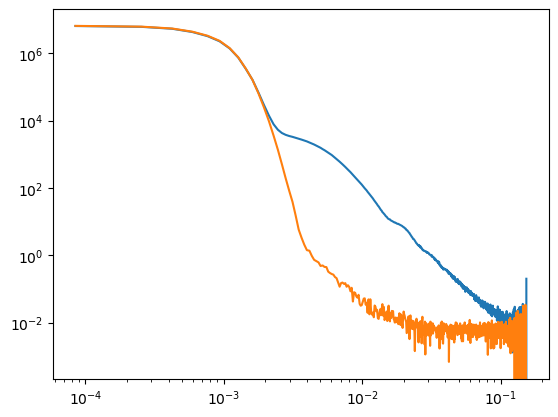

In [56]:
plt.loglog(esaxs_data['q'], esaxs_data['I'])
plt.loglog(esaxs_bkg_data['q'], esaxs_bkg_data['I'])

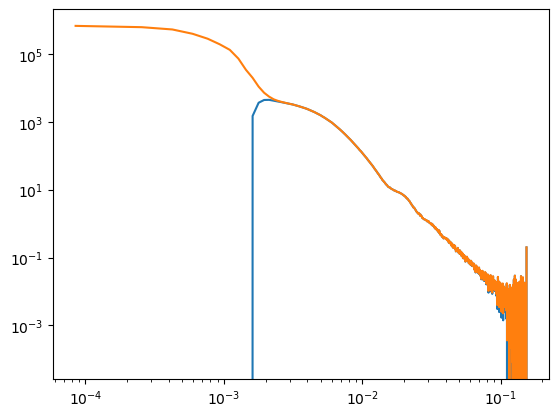

In [71]:
plt.loglog(esaxs_data['q'], esaxs_data['I'] - esaxs_bkg_data['I'])
plt.loglog(esaxs_data['q'], esaxs_data['I'] - scale_factor*esaxs_bkg_data['I'])


In [60]:
esaxs_metadata['Intensity1']/esaxs_bkg_metadata['Intensity1']

0.8872042421472405

In [61]:
esaxs_metadata['SumForIntensity1']/esaxs_bkg_metadata['SumForIntensity1']

0.8872025184842883

In [65]:
esaxs_data['I'][0]/esaxs_bkg_data['I'][0]

0.9902324273460307

In [64]:
esaxs_bkg_data['I'][0]

6522082.655000107

## 3. Data merge